<img alt="Colaboratory" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 2.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*

---

# Análise dos Dados do Airbnb - **TOSCANA, ITÁLIA**

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

**Neste *notebook*, iremos analisar os dados referentes à região de TOSCANA na ITÁLIA, e ver quais insights podem ser extraídos a partir de dados brutos.**

<center> <img alt="Toscana" width="40%" src="https://raw.githubusercontent.com/inaepmachado/Portfolio/master/imagens/toscana.jpg"></center>

Toscana é sim uma vasta região e cada parte dela, de norte a sul, tem suas próprias características peculiares. A região é divida em 10 províncias, mas muita gente ja ouviu fala de Chianti, Val D’Orcia, Crete Senese, Versilia etc. Essas são áreas geográficas ou vinícolas, mas não políticas. Entendendo essa parte, começamos então a estruturar onde ficar em base à sua exigência. 
Os dados fornecidos darão melhor dimensão de onde ficar como base, pelo tipo de propriedade que se queira alugar, assim como os valores de acordo com cada localidade.

In [ ]:
# importar todos os pacotes necessários para o estudo
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Obtenção dos Dados

No [site do Airbnb](http://insideairbnb.com/get-the-data.html) temos acesso a várias informações que podemos usar para estudos. Para este, especificamente,  iremos trabalhar com o seguinte arquivo:

* `listings.csv` - *Summary information and metrics for listings in Toscana, Itália (good for visualisations).*

In [ ]:
# importar o arquivo listings.csv para um DataFrame

df = pd.read_csv("http://data.insideairbnb.com/italy/toscana/florence/2020-04-30/visualisations/listings.csv")

## Análise dos Dados
Antes de qualquer modelagem ou avanço mais robusto, precisamos entender os dados que temos. Algumas perguntas que precisamos responder:
- Que tipos de informações temos, é mais qualitativa ou quantitativa?
- Como eles estão se comportando ao longo do tempo?
- Os dados estão consistentes ou não? 
- Temos muito outliers ou missings (dados faltantes)?
- Preciso fazer algum tipo de limpeza ou desconsiderar alguma variável?

Para isso, precisamos conhecer a nossa base de dados e quais variáveis ela possui:

In [ ]:
# mostrar as 2 primeiras entradas
df.head(2)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,24469,Fortezza/City Centre Modern Apt 2+2,99178,Benedetta And Lorenzo,NaN,Centro Storico,43.78308,11.24418,Entire home/apt,80,2,1,2019-09-27,0.14,5,342
1,24470,Fortezza/City Centre Modern Apt 2+1,99178,Benedetta And Lorenzo,NaN,Centro Storico,43.78287,11.24431,Entire home/apt,75,2,3,2019-04-21,0.03,5,353


**Dicionário das variáveis**


* `id` - número de id gerado para identificar o imóvel
* `name` - nome da propriedade anunciada
* `host_id` - número de id do proprietário (anfitrião) da propriedade
* `host_name` - nome do anfitrião
* `neighbourhood_group` - esta coluna não contém nenhum valor válido
* `neighbourhood` - nome do bairro
* `latitude` - coordenada da latitude da propriedade
* `longitude` - coordenada da longitude da propriedade
* `room_type` - informa o tipo de quarto que é oferecido
* `price` - preço para alugar o imóvel
* `minimum_nights` - quantidade mínima de noites para reservar
* `number_of_reviews` - número de reviews que a propriedade possui
* `last_review` - data do último review
* `reviews_per_month` - quantidade de reviews por mês
* `calculated_host_listings_count` - quantidade de imóveis do mesmo anfitrião
* `availability_365` - número de dias de disponibilidade dentro de 365 dias

### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

Esta base de dados que estamos trabalhando é pequena, então poderíamos simplesmente contar manualmente tanto a quantidade de variáveis como a quantidade de colunas. Porém, a maior parte dos projetos apresentam mais de 100 variáveis e na casa de milhares ou milhões de registros, então valeu muito investir em como identificar essas informações resumidas por aqui.

In [ ]:
# identificar o volume de dados do DataFrame: 
# shape[0] = #registros
# shape[1] = #variáveis

print("# Registros:\t{}".format(df.shape[0]))
print("# Variáveis:\t{}\n".format(df.shape[1])) 

# verificar as 2 primeiras entradas do dataset para identificar o tipo de variável que a base é composta
display(df.dtypes)

# Registros:	12256
# Variáveis:	16



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset* (missings)?**

A quantidade de missings é uma das principais informações que precisamos ter das variáveis, para saber se ela irá participar ou não das análises.

In [ ]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

neighbourhood_group               1.000000
reviews_per_month                 0.165878
last_review                       0.165878
name                              0.000245
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
minimum_nights                    0.000000
price                             0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
host_name                         0.000000
host_id                           0.000000
id                                0.000000
dtype: float64

Podemos ver em nossa base de estudo, que possui 12.256 registros e 16 variáveis:

- a variável `neighbourhood_group` possui 100% de missings: deverá ser desconsiderada por não haver registros para serem trabalhados; 
- a variável `reviews_per_month` por ser uma variável importante no contexto do Airbnb e ter 16.58% dos valores ausentes, podemos usar algum método de preenchimento desses valores ausentes, como a mediana, ou excluir somente as linhas em que essa variável está sem valor preenchido;
- as demais possuem um valor muito baixo de missing (0.02%) ou nenhum.

### **Q3. Qual o tipo de distribuição das variáveis?** 
Para identificar como as variáveis estão distribuídas e se existem outliers, vamos plotar um histograma para cada variável quantitativa (ou numérica).

Obs: se a variável é qualitativa (ou categórica), não podemos fazer essa visão em histograma (exemplo: `room_type`).




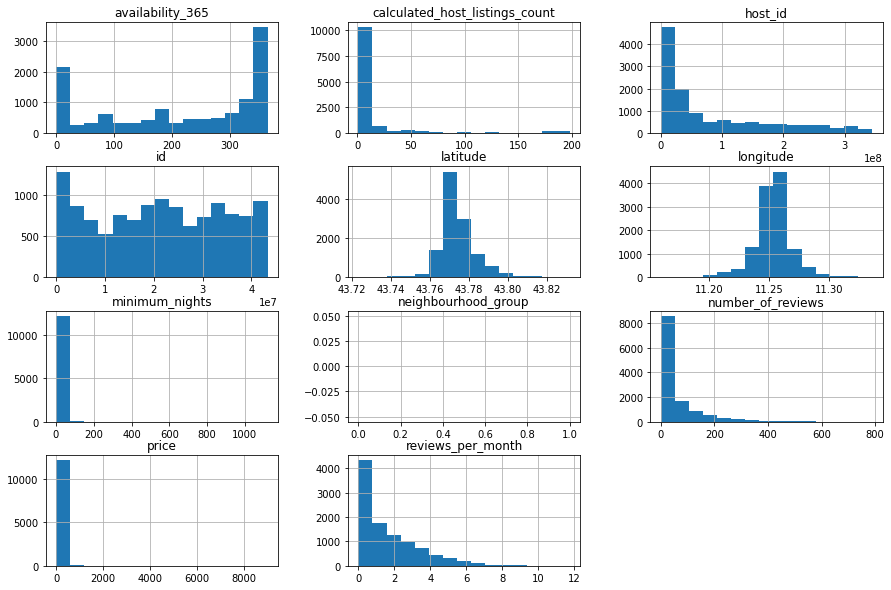

In [ ]:
# plotar o histograma das variáveis numéricas
df.hist(bins=15, figsize=(15,10));

### **Q4. Há *outliers* presentes?**

Pela distribuição do histograma acima, é possível verificar indícios da presença de *outliers*. Olhe, por exemplo, as variáveis `price`, `minimum_nights` e `calculated_host_listings_count`.

Os valores não seguem uma distribuição, e distorcem toda a representação gráfica. Para confirmar, há duas maneiras rápidas que auxiliam a detecção de *outliers*:

1) Resumo estatístico por meio do método `describe()`.

2) Plotar `boxplots` para a variável.

**1) Resumo estatístico das variáveis númericas:**

In [ ]:
# ver o resumo estatístico das variáveis numéricas: do banco de dados df, fazer o resumo somente das variáveis abaixo descritas
df[['availability_365', 'calculated_host_listings_count', 'minimum_nights', 'number_of_reviews', 'price', 'reviews_per_month']].describe()

,availability_365,calculated_host_listings_count,minimum_nights,number_of_reviews,price,reviews_per_month
count,12256.000000,12256.000000,12256.000000,12256.000000,12256.000000,10223.000000
mean,213.470382,14.674282,3.127040,52.667265,111.008241,1.686703
std,136.355936,36.665446,18.888332,81.495057,189.593135,1.712515
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.010000
25%,89.000000,1.000000,1.000000,2.000000,55.000000,0.330000
50%,244.500000,3.000000,2.000000,17.000000,80.000000,1.090000
75%,348.000000,7.000000,3.000000,69.000000,119.000000,2.555000
max,365.000000,198.000000,1120.000000,788.000000,9000.000000,11.750000


Olhando o resumo acima, podemos confirmar algumas hipóteses:
* a variável `calculated_host_listings_count` possui 75% dos valores abaixo de 7, porém com valor máximo de 198;
* A variável `price` possui 75% do valor abaixo de 119, porém seu valor máximo é 9000. Um estranho dado é existir um valor mínimo igual a *zero*, para o contexto de aluguel de imóveis; 
* O mesmo ocorre para a variável `number_of_reviews`, com 75% dos valores abaixo de 69 e valor máximo é 788;
* A quantidade mínima de noites (`minimum_nights`) está acima de 365 dias no ano, com maior valor de 1120. Isso não faz sentido, o ano possui 365 dias no máximo.

Em função disso, iremos fazer uma visão com Boxplot para cada variável acima e identificar onde podemos fazer o corte dos outliers. Para este corte, iremos seguir os seguintes passos:
* Definir o Q1 e Q3 para as variáveis que serão limpas;
* Calcular o IQR para as variáveis;
* Definir o limite superior e inferior para cortar os outliers;
* Remover os outliers.

**2.1) Boxplot para `calculated_host_listings_count`:**

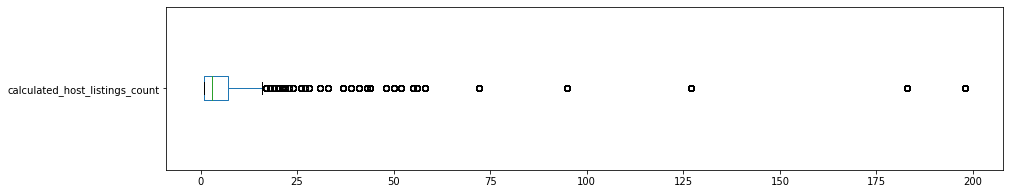


IQR da variável calculated_host_listings_count: 6.0
Limite inferior: -8.0
Limite superior: 16.0

Valores acima de 16 imóveis:
1910 entradas
15.5842%


In [ ]:
# calculated_host_listings_count 
df.calculated_host_listings_count.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

# identificando os outliers
q1_host = df.calculated_host_listings_count.quantile(.25)
q3_host = df.calculated_host_listings_count.quantile(.75)
IQR_host = q3_host - q1_host
print('\nIQR da variável calculated_host_listings_count:', IQR_host)

# definindo os limites +/- 1.5
inf_host = q1_host - 1.5 * IQR_host
sup_host = q3_host + 1.5 * IQR_host

print('Limite inferior:', inf_host)
print('Limite superior:', sup_host)

print("\nValores acima de 16 imóveis:")
print("{} entradas".format(len(df[df.calculated_host_listings_count > 16])))
print("{:.4f}%".format((len(df[df.calculated_host_listings_count > 16]) / df.shape[0])*100))

**2.2) Boxplot para `price`:**

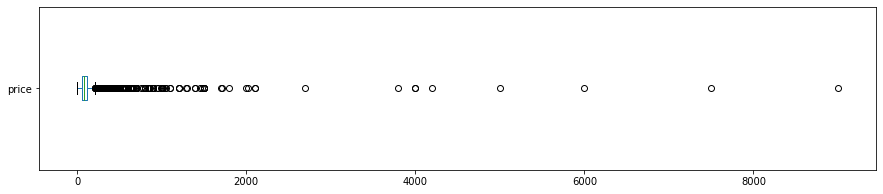


IQR da variável price: 64.0
Limite inferior: -41.0
Limite superior: 215.0

price com valores acima de 215:
862 entradas
7.0333%


In [ ]:
# price 
df.price.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

# identificando os outliers
q1_price = df.price.quantile(.25)
q3_price = df.price.quantile(.75)
IQR_price = q3_price - q1_price
print('\nIQR da variável price:', IQR_price)

# definindo os limites +/- 1.5
inf_price = q1_price - 1.5 * IQR_price
sup_price = q3_price + 1.5 * IQR_price

print('Limite inferior:', inf_price)
print('Limite superior:', sup_price)

# ver quantidade de valores acima de 215 para price
print("\nprice com valores acima de 215:")
print("{} entradas".format(len(df[df.price > 215])))
print("{:.4f}%".format((len(df[df.price > 215]) / df.shape[0])*100))

**2.3) Boxplot para `number_of_reviews`:**

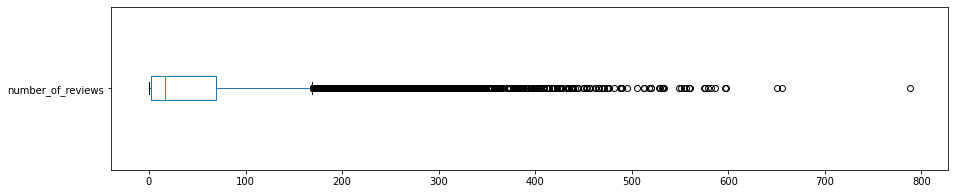


IQR da variável number_of_reviews: 67.0
Limite inferior: -98.5
Limite superior: 169.5

number_of_reviews com valores acima de 170:
1076 entradas
8.7794%


In [ ]:
# number_of_reviews 
df.number_of_reviews.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

# identificando os outliers
q1_rev = df.number_of_reviews.quantile(.25)
q3_rev = df.number_of_reviews.quantile(.75)
IQR_rev = q3_rev - q1_rev
print('\nIQR da variável number_of_reviews:', IQR_rev)

# definindo os limites +/- 1.5
inf_rev = q1_rev - 1.5 * IQR_rev
sup_rev = q3_rev + 1.5 * IQR_rev

print('Limite inferior:', inf_rev)
print('Limite superior:', sup_rev)

# ver quantidade de valores acima de 170 para number_of_reviews
print("\nnumber_of_reviews com valores acima de 170:")
print("{} entradas".format(len(df[df.number_of_reviews > 170])))
print("{:.4f}%".format((len(df[df.number_of_reviews > 170]) / df.shape[0])*100))

**2.4) Boxplot para `minimum_nights`:**

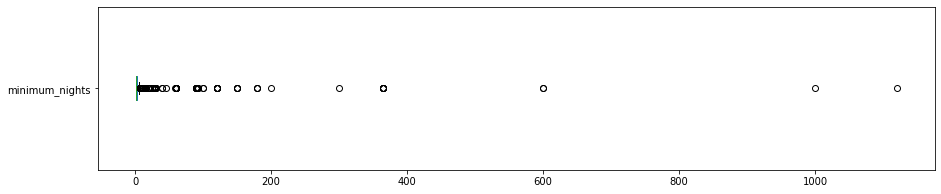


IQR da variável number_of_reviews: 2.0
Limite inferior: -2.0
Limite superior: 6.0

minimum_nights com valores acima de 6:
397 entradas
3.2392%


In [ ]:
# minimum_nights 
df.minimum_nights.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

# identificando os outliers
q1_nit = df.minimum_nights.quantile(.25)
q3_nit = df.minimum_nights.quantile(.75)
IQR_nit = q3_nit - q1_nit
print('\nIQR da variável number_of_reviews:', IQR_nit)

# definindo os limites +/- 1.5
inf_nit = q1_nit - 1.5 * IQR_nit
sup_nit = q3_nit + 1.5 * IQR_nit

print('Limite inferior:', inf_nit)
print('Limite superior:', sup_nit)

# ver quantidade de valores acima de 6 para minimum_nights
print("\nminimum_nights com valores acima de 6:")
print("{} entradas".format(len(df[df.minimum_nights > 6])))
print("{:.4f}%".format((len(df[df.minimum_nights > 6]) / df.shape[0])*100))

Com as variáveis escolhidas que apresentam outliers e com os valores delimitados, vamos plotar novamente os histogramas para conferir que os valores delimitados foram satisfatórios. Caso seja necessário, volte ao passo anterior para escolher novos valores - *esse cuidado com a análise é fundamental e necessária para o bom desempenho das variáveis no estudo.*

**3) Histogramas Sem Outliers:**



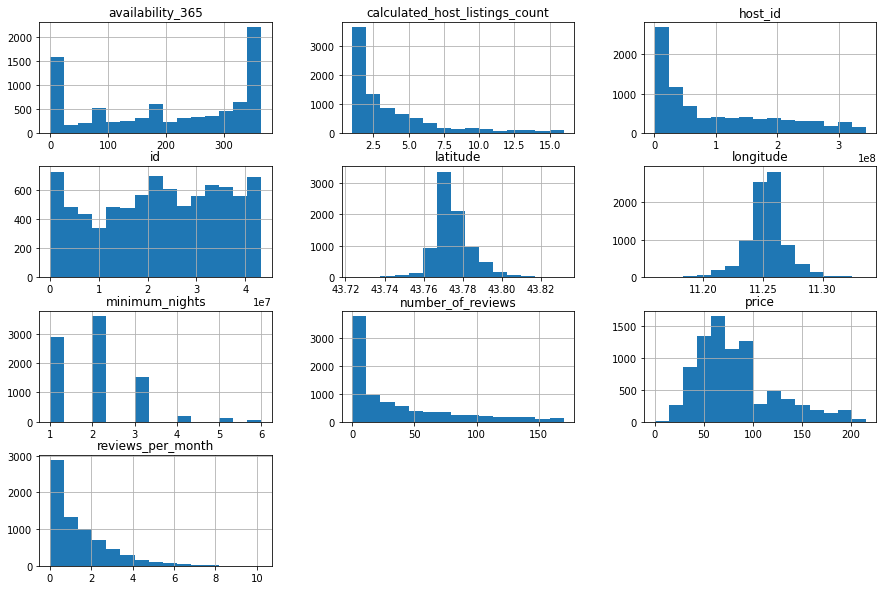

In [ ]:
# remover os *outliers* em um novo DataFrame
# df_clean será o novo objeto da base copiada, onde farei a limpeza dos outliers
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.calculated_host_listings_count > 16].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.price > 215].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.number_of_reviews > 170].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 6].index, axis=0, inplace=True)

# remover `neighbourhood_group`, pois está vazio
df_clean.drop('neighbourhood_group', axis=1, inplace=True)

# plotar o histograma para as variáveis numéricas
df_clean.hist(bins=15, figsize=(15,10));

### **Q4. Qual a média dos preços de aluguel?**

Aqui iremos calcular a média de `price` em duas visões: Média Total e Média Limpa, após retirada dos outliers acima de 1000.

In [ ]:
print("Média Total:\t{}".format(df.price.mean()))
print("Média Limpa:\t{}\n".format(df_clean.price.mean()))

Média Total:	111.0082408616188
Média Limpa:	104.02226629405932



### **Q4. Qual a correlação existente entre as variáveis**

Quando existe correlação significa que existe uma relação entre duas coisas. Nesse caso, estamos buscando relação entre duas variáveis.

Essa relação pode ser medida e é função do coeficiente de correlação estabelecer qual a intensidade dela, que pode variar entre -1 e +1, sendo:
- Quanto mais próximo de -1, mais forte é a correlação negativa entre as variáveis.
- Quanto mais próximo de +1, mais forte é a correlação positiva entre as variáveis.

Abaixo iremos calcular as correlações e darei o exemplo de como deve ser a leitura desse número.

Para identificar as correlações existentes entre as variáveis de interesse, precisamos:
* Criar uma matriz de correlação
* Gerar um *heatmap* a partir dessa matriz, usando a biblioteca `seaborn`

Utilizando a base limpa de outliers, temos:

In [ ]:
# criar uma matriz de correlação
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].corr()

# mostrar a matriz de correlação
display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,0.003787,-0.139944,-0.133477,0.164932,0.135702
minimum_nights,0.003787,1.000000,-0.044804,-0.132927,-0.015329,-0.017966
number_of_reviews,-0.139944,-0.044804,1.000000,0.772118,-0.087994,0.084255
reviews_per_month,-0.133477,-0.132927,0.772118,1.000000,-0.108435,0.043004
calculated_host_listings_count,0.164932,-0.015329,-0.087994,-0.108435,1.000000,0.125328
availability_365,0.135702,-0.017966,0.084255,0.043004,0.125328,1.000000


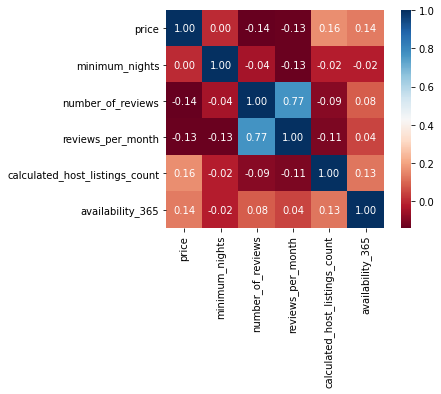

In [ ]:
# plotar um heatmap a partir das correlações
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

Pelo gráfico acima, temos algumas relações interessantes:

- a única correlação forte existente é uma relação positiva (+0.77) entre a variàvel `number_of_reviews` e `reviews_per_month`. *Aqui, podemos ter um problema de multicolinearidade, onde variáveis parecidas ou com alta correlação entram no modelo, precisamos nos atentar ao tipo de modelo que é sensível ou não a esse problema.*
- uma relação que era esperado ser alta e não ocorreu (+0.135702) era entre `availability_365 ` e `price`, uma vez que quanto mais dias disponíveis o imóvel fica, menor é o preço de aluguel.

### **Q5. Qual o tipo de imóvel mais alugado no Airbnb?**

A coluna da variável `room_type` indica o tipo de locação que está anunciada no Airbnb. Mas você conhece os tipos de locação que são anunciadas no Airbnb? 

Eu não conheço, mas isso não é um problema. A grande beleza de todo estudo é justamente aprender com os dados, por isso é de fundamental importância fazermos toda análise descritiva para conhecermos nossa base de estudo.

Para identificar quel é o imóvel mais alugado, vamos contar a quantidade de ocorrências de cada tipo de aluguel, usando o método `value_counts()`.

**Como veremos abaixo, o imóvel mais alugado é apartamentos/casas inteiras, representando *75%* de todos os aluguéis efetuados.**

In [ ]:

# mostrar a quantidade de cada tipo de imóvel disponível
df_clean.room_type.value_counts()

Entire home/apt    8319
Private room       2444
Hotel room          279
Shared room          51
Name: room_type, dtype: int64

In [ ]:
# mostrar a porcentagem de cada tipo de imóvel disponível
print("Total imóveis:\t{}\n".format(df_clean.shape[0]))
print("Percentual:\t")
print(format(df_clean.room_type.value_counts() / df_clean.shape[0]))

Total imóveis:	11093

Percentual:	
Entire home/apt    0.749932
Private room       0.220319
Hotel room         0.025151
Shared room        0.004597
Name: room_type, dtype: float64


### **Q6. Qual a localidade mais cara de Toscana, na Itália?**

Aqui queremos localizar o bairro mais caro da região de Toscana, na Itália, a partir do preço de locação da variável `price`.


In [ ]:
# ver preços por bairros, na média
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)

neighbourhood
Gavinana Galluzzo    114.611236
Centro Storico       112.438592
Campo di Marte        83.919866
Rifredi               73.644033
Isolotto Legnaia      69.502868
Name: price, dtype: float64

Mas somente o preço médio basta para dizer que o bairro Gavinana é o mais caro? Será que podemos ter algum viés na amostra? Como eu não conheço a Itália, vamos ver o que os dados dizem a respeito dessas dúvidas.

**1) Qual a quantidade de registros temos por bairro?**

A princípio, olhando a distribuição da amostra por bairro, parece ser uma amostra representativa, sendo que o segundo bairro mais caro é o penúltimo em termos de representatividade em volumetria, não parecendo haver alguma distorção entre volume x preço.
Mas vamos checar como está a distribuição dos valores por localidade.

**2) Qual a dispersão do preço?**

Pela dispersão dos valores x localidade, identificamos que não existe problema de representatividade na amostra, os dados estão bem distribuídos. Com isso, o cálculo que indica o bairro ***Gavinana Galluzzo*** como sendo o mais caro pode ser considerado válido.

In [ ]:
# quantidade de registros por bairro
df_clean.neighbourhood.value_counts()

Centro Storico       7955
Campo di Marte       1198
Rifredi               972
Isolotto Legnaia      523
Gavinana Galluzzo     445
Name: neighbourhood, dtype: int64

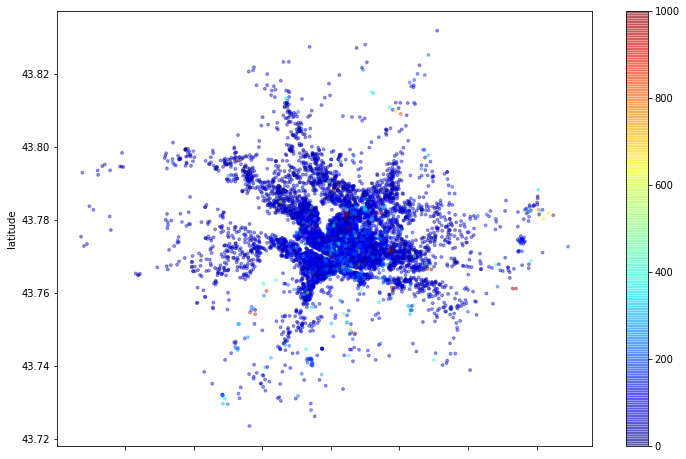

In [ ]:
# plotar os imóveis pela latitude-longitude
df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8, 
              cmap=plt.get_cmap('jet'), figsize=(12,8));

### **Q7. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**
Aqui iremos calcular a média de `minimum_nights` em duas visões: Média Total e Média Limpa, após retirada dos outliers acima de 20.

A quantidade média no mínimo de noites é de 2 dias, considerando 98.7% dos dados. Se formos considerar a base completa, com os outliers, temos uma média de 3 dias de noites mínimas contratadas. Ou seja, como outlier estamos falando em 1.3% dos dados que faz a quantidade mínima de noites média aumentar 50%.

In [ ]:
# ver a média da coluna `minimum_nights`
print("Média Total:\t{}".format(df.minimum_nights.mean()))
print("Média Limpa:\t{}\n".format(df_clean.minimum_nights.mean()))

Média Total:	3.127039817232376
Média Limpa:	2.1064635355629675



## Conclusões


Foi feita uma análise superficial dos aluguéis na cidade de Toscana, na Itália. Pode-se ver que apesar do Airbnb ser bem difundido, nessa cidade temos disponíveis em apenas 5 bairros, com 1.3% dos aluguéis com valores  bem acima do que é praticado na média.
O segundo bairro mais caro para se alugar é no Centro histórico, o que faz muito sentido devido a região ser totalmente turística.
Não foi possível identificar correlação alta entre as variáveis estudadas, porém precisamos lembrar que esse estudo foi feito com uma versão resumida dos dados disponibilizados pelo Airbnb, para fazer alguma análise exploratória mais profunda o ideal é usarmos os dados completos com as mais de 100 variáveis que tem disponíveis.

Esse estudo teve três principais objetivos:

(1) Desmistificar o uso da ferramenta para análises simples e com poucos dados, vale a pena investir um tempo de aprendizado mesmo que para análises simples, elas se tornarão mais práticas ainda, de fácil entendimento e atualização.

(2) Dar um norte de como fazer uma análise inicial descritiva de uma base simples, com inputs suficientes para direcionarmos os próximos passos.

(3) Mostrar que junto ao programa de análise é possível incrementar com um Storytelling, agregando valor à entrega final, sem ter duplo trabalho de execução e apresentação.